In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam



In [2]:

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def convert_ip(ip):
    ip = ip.strip().split('.')
    convert = []
    total = 0.0
    for each in ip:
        a = int(each)
        convert.append(a)
    for i in range(len(convert)):
        total += convert[i]*pow(64, len(convert)-i)
    return total

In [3]:
data = pd.read_csv("IoT Network Intrusion Dataset.csv")
Src_IP = np.array(data['Src_IP'])
Dst_IP = np.array(data['Dst_IP'])
src = []
for each in Src_IP:
    src.append(convert_ip(each))
dst = []
for each in Dst_IP:
    dst.append(convert_ip(each))

x_data = data.drop(['Label','Flow_ID', 'Src_IP','Timestamp', 'Dst_IP', 'Cat', 'Sub_Cat'], axis=1)
Y = np.array([0 if each == "Normal" else 1 for each in data.Label])
df = pd.DataFrame({'src_ip':src,
                   'dst_ip': dst})
df.head()

X = pd.concat([x_data, df], axis=1)


In [4]:
X.replace([np.inf, -np.inf], 0, inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(X)


In [6]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scaled,Y,test_size=0.3,random_state=42)

In [7]:
X_train.T.shape

(81, 438048)

In [8]:
#method 2
model = Sequential()
model.add(Dense(64, input_shape=(81,), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, verbose=0, epochs=50)





<Figure size 576x432 with 0 Axes>

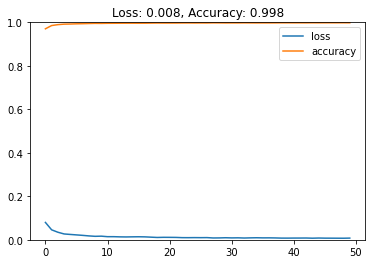

In [10]:
plot_loss_accuracy(history)

In [12]:
pred = model.predict(X_test)

5867/5867 [==============================] - 3s 533us/step


In [18]:
pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [16]:
Y_test

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
pred = np.where(pred > 0.5, 1, 0)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[ 11775    220]
 [    26 175714]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11995
           1       1.00      1.00      1.00    175740

    accuracy                           1.00    187735
   macro avg       1.00      0.99      0.99    187735
weighted avg       1.00      1.00      1.00    187735



<AxesSubplot:>

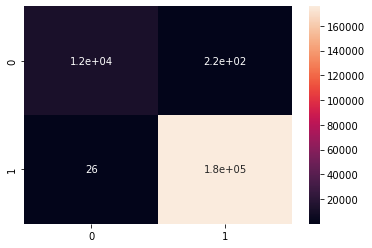

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, pred), annot=True)